In [11]:
!pip install lasio
import pandas as pd
import matplotlib.pyplot as plt

import lasio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.2 MB/s 


In [14]:
df=pd.read_csv("15_9-19A-CORE.csv")

In [15]:
df.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [16]:
df.columns

Index(['DEPTH', 'OrigDepth', 'CORE_NO', 'SAMPLE', 'CKHG', 'CKHL', 'CKVG',
       'CKVL', 'CPOR', 'CPORV', 'So', 'Sw', 'CGD', 'CGDV'],
      dtype='object')

In [ ]:
core_data = pd.read_csv('L05_09_CORE.csv')

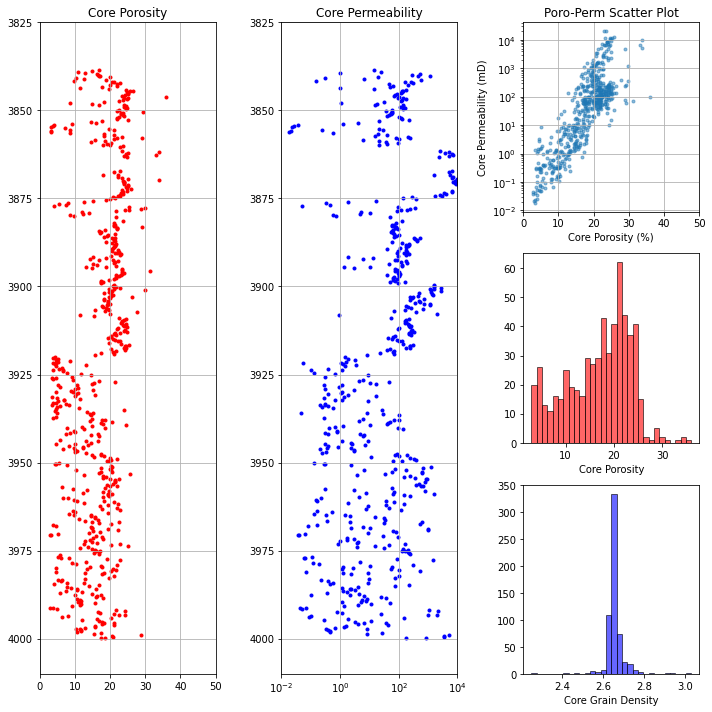

In [17]:
#Create the figure
fig, ax = plt.subplots(figsize=(10,10))

#Add the axes / subplots using subplot2grid
ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), rowspan=3)
ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2))
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2))
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,2))

#Add ax1 to show CPOR (Core Porosity) vs DEPTH
ax1.scatter(df['CPOR'], df['DEPTH'], marker='.', c='red')
ax1.set_xlim(0, 50)
ax1.set_ylim(4010, 3825)
ax1.set_title('Core Porosity')
ax1.grid()

#Add ax2 to show CKHG (Core Permeability) vs DEPTH
ax2.scatter(df['CKHG'], df['DEPTH'], marker='.', c='blue')
ax2.set_xlim(0.01, 10000)
ax2.semilogx()
ax2.set_ylim(4010, 3825)
ax2.set_title('Core Permeability')
ax2.grid()

#Add ax3 to show CPOR (Core Porosity) vs CKHG (Core Permeability)
ax3.scatter(df['CPOR'], df['CKHG'], marker='.', alpha=0.5)
ax3.semilogy()
ax3.set_xlim(0.01, 10000)
ax3.set_xlim(0,50)
ax3.set_title('Poro-Perm Scatter Plot')
ax3.set_xlabel('Core Porosity (%)')
ax3.set_ylabel('Core Permeability (mD)')
ax3.grid()

#Add ax4 to show a histogram of CPOR - Core Porosity
ax4.hist(df['CPOR'], bins=30, edgecolor='black', color='red', alpha=0.6)
ax4.set_xlabel('Core Porosity')

#Add ax5 to show a histogram of CGD - Core Grain Density
ax5.hist(df['CGD'], bins=30, edgecolor='black', color='blue', alpha=0.6)
ax5.set_xlabel('Core Grain Density')

plt.tight_layout()
plt.savefig('CoreDataDashBoard.png', dpi=300)
plt.show()

In [18]:
cpi = lasio.read('15_9-19_A_CPI.las').df()
cpi['PHIF']=cpi['PHIF']*100
cpi.columns

Only engine='normal' can read wrapped files


Index(['BS', 'BVW', 'CARB_FLAG', 'COAL_FLAG', 'DELTA', 'GRMAX', 'GRMIN', 'J',
       'KLHC_INT', 'KLOGH', 'M', 'N', 'PERF_FLAG', 'PHIF', 'PORD', 'RHOFL',
       'RHOMA', 'RW', 'SAND_FLAG', 'SW', 'SWIRR', 'TEMP', 'VSH'],
      dtype='object')

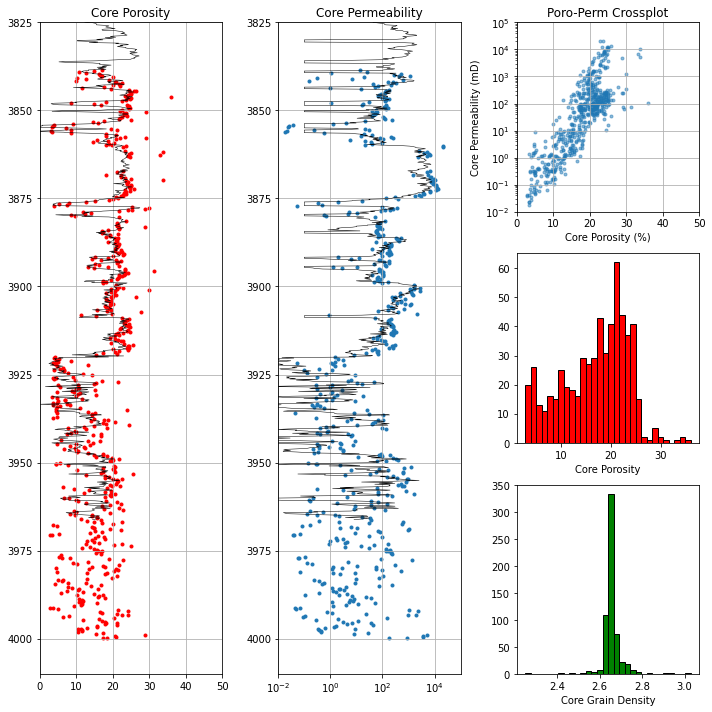

In [19]:
#Add lines from the CPI dataframe to the plot.

#Create the figure
fig, ax = plt.subplots(figsize=(10,10))

#Add the axes / subplots using subplot2grid
ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), rowspan=3)
ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2), rowspan=1)
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2), rowspan=1)
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,2), rowspan=1)

#Add ax1 to show CPOR (Core Porosity) vs DEPTH
ax1.scatter(df['CPOR'], df['DEPTH'], marker='.', c='red')
ax1.plot(cpi['PHIF'], cpi.index, c='black', lw=0.5)
ax1.set_xlim(0, 50)
ax1.set_ylim(4010, 3825)
ax1.set_title('Core Porosity')
ax1.grid()

#Add ax2 to show CKHG (Core Permeability) vs DEPTH
ax2.scatter(df['CKHG'], df['DEPTH'], marker='.')
ax2.plot(cpi['KLOGH'], cpi.index, c='black', lw=0.5)
ax2.set_xlim(0.01, 100000)
ax2.set_ylim(4010, 3825)
ax2.semilogx()
ax2.set_title('Core Permeability')
ax2.grid()

#Add ax3 to show CPOR (Core Porosity) vs CKHG (Core Permeability)
ax3.scatter(df['CPOR'], df['CKHG'], marker='.', alpha=0.5)
ax3.semilogy()
ax3.set_ylim(0.01, 100000)
ax3.set_xlim(0, 50)
ax3.set_title('Poro-Perm Crossplot')
ax3.set_xlabel('Core Porosity (%)')
ax3.set_ylabel('Core Permeability (mD)')
ax3.grid()

#Add ax4 to show a histogram of CPOR - Core Porosity
ax4.hist(df['CPOR'], bins=30, edgecolor='black', color='red')
ax4.set_xlabel('Core Porosity')

#Add ax5 to show a histogram of CGD - Core Grain Density
ax5.hist(df['CGD'], bins=30, edgecolor='black', color='green')
ax5.set_xlabel('Core Grain Density')

plt.tight_layout()
plt.show()
